In [6]:
import pandas as pd
import seaborn as sns
import numpy as np


Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, 
    типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиальные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer,
    в зависимости от возраста (x – возраст, y – число успешных операций).
    Клиенты какого возраста совершили наибольшее количество успешных действий?
 

Описание данных
user_data:

client – идентификатор пользователя\
premium – является ли клиент премиальным\
age – возраст\

logs:\
client – идентификатор пользователя\
success – результат (успех – 1, нет – 0)\
platform – платформа\
time – время в формате Unix


# 1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [7]:
# 1 датасеты
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
# 1 размеры
user_data.shape

(2954, 3)

In [10]:
logs.shape

(4500, 4)

In [11]:
# 1 типы переменных
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [12]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [13]:
# 1 наличие пропущенных значений
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [14]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [15]:
# 1 описательная статистика
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [16]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [17]:
# 1 Сколько уникальных значений принимает переменная platform?
logs['platform'].unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [18]:
len(logs['platform'].unique())

3

# 2. Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий,\
перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [19]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [20]:
# количество уникальных клиентов
logs['client'].nunique()

4011

In [21]:
client_success_count = logs[['client','success']].replace({True:1,
                                               False:0})
client_success_count.head()

,client,success
0,40177,1
1,61468,1
2,35604,0
3,9961,1
4,10931,1


In [22]:
client_success_count = client_success_count.groupby('client', as_index = False) \
    .agg({'success':'sum'}) \
    .sort_values('success', ascending = False)
client_success_count

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [23]:
client_most_success_count = client_success_count.query('success==41').sort_values(by = 'client')
client_most_success_count

,client,success
468,12179,41
1120,28719,41
1426,36165,41
2095,52870,41
2468,61468,41
2469,61473,41
3141,78349,41
3300,82563,41
3712,92584,41


In [24]:
# 2 ответ
client_most_success_count['client'].unique()

array([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584],
      dtype=int64)

# 3. С какой платформы было совершено наибольшее количество успешных операций?

In [25]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [26]:
logs['success'] = logs['success'].replace({True:1,
                                            False:0})
logs.head()

,client,success,platform,time
0,40177,1,phone,1585412212
1,61468,1,phone,1585425658
2,35604,0,phone,1585459894
3,9961,1,phone,1585400189
4,10931,1,computer,1585468629


In [27]:
# 3 ответ
logs.groupby('platform', as_index = False).agg({'success':'sum'}).sort_values(by = 'success', ascending = False)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


# 4. Какая платформа наиболее популярна среди премиумных клиентов?

In [28]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [29]:
logs.head()

,client,success,platform,time
0,40177,1,phone,1585412212
1,61468,1,phone,1585425658
2,35604,0,phone,1585459894
3,9961,1,phone,1585400189
4,10931,1,computer,1585468629


In [30]:
df = user_data.merge(logs, on = 'client')
df.head()

,client,premium,age,success,platform,time
0,46346,False,58,1,phone,1585452839
1,4391,False,55,0,phone,1585409861
2,27372,False,64,0,phone,1585446018
3,11989,False,44,1,computer,1585403698
4,60664,False,49,1,phone,1585406918


In [31]:
df['premium'] = df['premium'].replace({True:1,
            False:0})
df.head()

,client,premium,age,success,platform,time
0,46346,0,58,1,phone,1585452839
1,4391,0,55,0,phone,1585409861
2,27372,0,64,0,phone,1585446018
3,11989,0,44,1,computer,1585403698
4,60664,0,49,1,phone,1585406918


In [32]:
# 4 ответ
df.groupby('platform', as_index = False).agg({'premium':'sum'}).sort_values(by = 'premium', ascending = False )

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


# 5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [33]:
df.head()

,client,premium,age,success,platform,time
0,46346,0,58,1,phone,1585452839
1,4391,0,55,0,phone,1585409861
2,27372,0,64,0,phone,1585446018
3,11989,0,44,1,computer,1585403698
4,60664,0,49,1,phone,1585406918


In [34]:
t = df.groupby(['age', 'premium'])['client'].count().reset_index().rename(columns = {'client':'count'})
t['pct'] = t.apply(lambda x: x['count']/t[t['premium']==1]['count'].sum()*100 if x['premium']==1 \
                   else x['count']/t[t['premium']==0]['count'].sum()*100, axis = 1)
t

,age,premium,count,pct
0,20,0,46,1.523683
1,20,1,9,2.142857
2,21,0,50,1.656178
3,21,1,8,1.904762
4,22,0,51,1.689301
...,...,...,...,...
95,67,1,11,2.619048
96,68,0,98,3.246108
97,68,1,9,2.142857
98,69,0,83,2.749255


premium
Не премиум    AxesSubplot(0.125,0.11;0.775x0.77)
Премиум       AxesSubplot(0.125,0.11;0.775x0.77)
Name: count, dtype: object

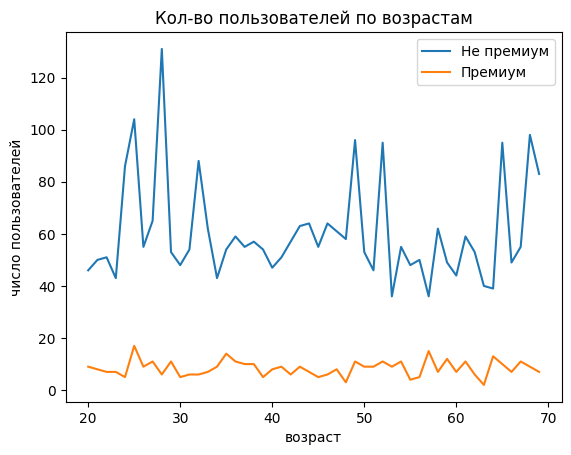

In [35]:
tt = t.set_index('age')
tt['premium'] = tt['premium'].replace({1:'Премиум', 0: 'Не премиум'})
tt.groupby('premium')['count'] \
    .plot(x = 'age', y = 'count', legend = True,\
    ylabel = 'число пользователей', xlabel = 'возраст',\
    title = 'Кол-во пользователей по возрастам')

premium
Не премиум    AxesSubplot(0.125,0.11;0.775x0.77)
Премиум       AxesSubplot(0.125,0.11;0.775x0.77)
Name: pct, dtype: object

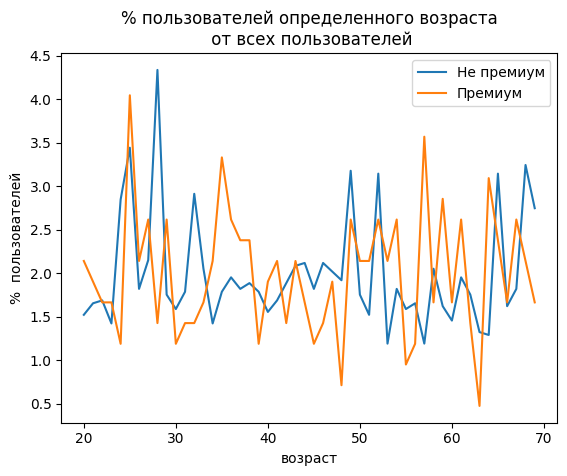

In [44]:
tt['premium'] = tt['premium'].replace({1:'premium', 0: 'not_premium'})
tt.groupby('premium')['pct'] \
    .plot(x = 'age', y = 'pct', legend = True,\
    ylabel = '%  пользователей', xlabel = 'возраст', title = '% пользователей определенного возраста\n от всех пользователей')

 # 6. Постройте график распределения числа успешных операций: 

 x – число успешных операций\
 y – число клиентов, совершивших такое количество успешных операций


In [61]:
df.head()

,client,premium,age,success,platform,time
0,46346,0,58,1,phone,1585452839
1,4391,0,55,0,phone,1585409861
2,27372,0,64,0,phone,1585446018
3,11989,0,44,1,computer,1585403698
4,60664,0,49,1,phone,1585406918


In [104]:
success = df.groupby('client')['success'] \
    .agg(['sum','count','mean']).reset_index() \
    .rename(columns = {'sum':'success_count', 'count':'tries_count','mean':'success_rate'})
success.sort_values('tries_count', ascending = False)

,client,success_count,tries_count,success_rate
1791,61468,41,42,0.97619
1792,61473,41,41,1.00000
1862,64064,40,41,0.97561
2306,78349,41,41,1.00000
2723,92584,41,41,1.00000
...,...,...,...,...
998,35037,1,1,1.00000
999,35107,1,1,1.00000
1000,35126,1,1,1.00000
1001,35162,1,1,1.00000


<AxesSubplot:title={'center':'Распределение числа успешных операций'}, xlabel='число успешных операций', ylabel='число клиентов'>

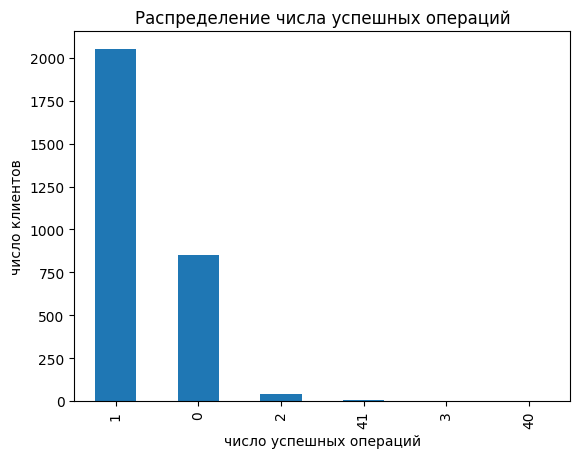

In [75]:
success.groupby('success_count')['client'] \
    .count().reset_index().sort_values('client', ascending = False) \
    .plot(x = 'success_count', y = 'client', kind = 'bar', \
          xlabel = 'число успешных операций', ylabel = 'число клиентов', legend = False, \
         title = 'Распределение числа успешных операций')

# 7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста.
x – возраст, y – число успешных операций \
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [47]:
df.head()

,client,premium,age,success,platform,time
0,46346,0,58,1,phone,1585452839
1,4391,0,55,0,phone,1585409861
2,27372,0,64,0,phone,1585446018
3,11989,0,44,1,computer,1585403698
4,60664,0,49,1,phone,1585406918


In [102]:
success_count = df.groupby(['platform','age'])['success'].sum().reset_index().sort_values('age')
comp_success = success_count.query('platform == "computer"')

<AxesSubplot:title={'center':'Распределение числа успешных операций, сделанных на платформе computer,\n в зависимости от возраста'}, xlabel='возраст', ylabel='число клиентов'>

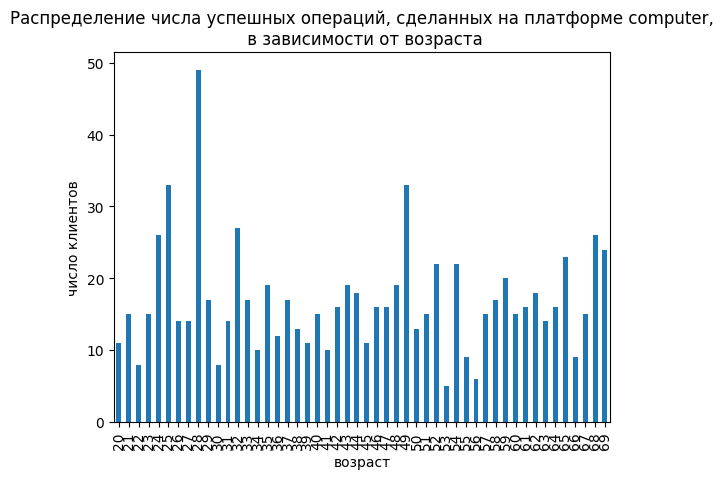

In [101]:
comp_success.plot(x = 'age', y = 'success', kind = 'bar', \
                  legend = False, xlabel = 'возраст', ylabel = 'число клиентов', \
                  title = 'Распределение числа успешных операций, сделанных на платформе computer,\n в зависимости от возраста')